<font size="6">PROJET 5 : Catégorisez automatiquement des questions </font>

**Librairies**

In [44]:
# Data analyse
import pandas as pd
import numpy as np
import re
from pprint import pprint

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Visualisation
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Preprocess and evaluation
import nltk
from nltk.corpus import stopwords

In [5]:
# Modèles
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

C:\Users\EliseAndro\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# spacy for lemmatization
import spacy

# Chargement des données

## Chargement

In [6]:
df = pd.read_csv("QueryResults.csv")

In [7]:
df

,Body,Title,Tags
0,<p>Is there any way to tinker with the iPhone ...,How can I develop for iPhone using a Windows d...,<ios><iphone><windows>
1,<p>I have this gigantic ugly string:</p>\n<pre...,My regex is matching too much. How do I make i...,<regex>
2,<p>I am Working with autolayout and constraint...,"What is ""Constrain to margin"" in Storyboard in...",<ios><xcode><storyboard><autolayout><xcode6>
3,<p>I'm learning objective-c and keep bumping i...,What does the @ symbol represent in objective-c?,<objective-c>
4,"<p>Is there a simple way, in a pretty standard...",Delete all but the most recent X files in bash,<bash><unix><scripting>
...,...,...,...
44990,"<p>Recently, I upgraded the version of Django ...",ImportError: cannot import name 'six' from 'dj...,<django>
44991,<p>How can I reject a promise that returned by...,How to reject in async/await syntax?,<javascript><asynchronous><typescript><es6-pro...
44992,<p>I have 2 entities that are related as one t...,.Net Core 3.0 possible object cycle was detect...,<c#><asp.net-core><entity-framework-core>
44993,<h2>Problem</h2>\n\n<p>I want to return a file...,Return file in ASP.Net Core Web API,<c#><asp.net-core><.net-core><asp.net-core-web...


## Nettoyage

In [8]:
def remove_punctuation_and_number(text):
    """remove all punctuation and number"""
    return text.translate(str.maketrans(" ", " ", charac)) 


def remove_non_alphabetical_character(text):
    """remove all non-alphabetical character"""
    text = re.sub("[^a-z]+", " ", text) # remove all non-alphabetical character
    text = re.sub("\s+", " ", text) # remove whitespaces left after the last operation
    return text

In [10]:
# Nettoyage de la colonne Body
df['Body'] = [re.sub('<[^>]+>', '', i) for i in df['Body']]
df['Body'] = [re.sub('\n', '', i) for i in df['Body']]

df['Title'] = df['Title'].apply(lambda x: remove_non_alphabetical_character(x)) 
df['Body'] = df['Body'].apply(lambda x: remove_non_alphabetical_character(x)) 

# Nettoyage de la colonne Tags
tags_nettoye = [re.sub('><', ',', i)[1:-1] for i in df['Tags']]

In [11]:
df['Tags'] = tags_nettoye

In [12]:
def remove_single_letter(text):
    """remove single alphabetical character"""
    text = re.sub(r"\b\w{1}\b", "", text) # remove all single letter
    text = re.sub("\s+", " ", text) # remove whitespaces left after the last operation
    text = text.strip(" ")
    return text

In [13]:
df['Title'] = df['Title'].apply(lambda x: remove_single_letter(x)) 
df['Body'] = df['Body'].apply(lambda x: remove_single_letter(x)) 

In [14]:
df

,Body,Title,Tags
0,there any way to tinker with the hone on indow...,ow can develop for hone using indows developme...,"ios,iphone,windows"
1,have this gigantic ugly string ransaction star...,regex is matching too much ow do make it stop,regex
2,am orking with autolayout and constraints and ...,hat is onstrain to margin in toryboard in code,"ios,xcode,storyboard,autolayout,xcode6"
3,learning objective and keep bumping into the s...,hat does the symbol represent in objective,objective-c
4,there simple way in pretty standard environmen...,elete all but the most recent files in bash,"bash,unix,scripting"
...,...,...,...
44990,ecently upgraded the version of jango framewor...,mport rror cannot import name six from django ...,django
44991,ow can reject promise that returned by an asyn...,ow to reject in async await syntax,"javascript,asynchronous,typescript,es6-promise..."
44992,have entities that are related as one to manyp...,et ore possible object cycle was detected whic...,"c#,asp.net-core,entity-framework-core"
44993,roblem want to return file in my et eb ontroll...,eturn file in et ore eb,"c#,asp.net-core,.net-core,asp.net-core-webapi"


In [15]:
df.shape

(44995, 3)

In [16]:
# Vérification des Nan
df.dropna().shape

(44995, 3)

In [17]:
# Vérification des doublons
df.drop_duplicates().shape

(44995, 3)

# Preprocess : tokenisation et analyse des fréquences

## Tokenisation et fusion du body et titre

In [18]:
df['Body'] = [i.lower() for i in df['Body']]
df['Title'] = [i.lower() for i in df['Title']]

In [19]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
df['Body'] = [tokenizer.tokenize(i) for i in df['Body']]
df['Title'] = [tokenizer.tokenize(i) for i in df['Title']]

In [20]:
df['Title+Body'] = df['Body'] + df['Title']
df = df[['Title+Body',"Tags"]]

In [21]:
df.head()

,Title+Body,Tags
0,"[there, any, way, to, tinker, with, the, hone,...","ios,iphone,windows"
1,"[have, this, gigantic, ugly, string, ransactio...",regex
2,"[am, orking, with, autolayout, and, constraint...","ios,xcode,storyboard,autolayout,xcode6"
3,"[learning, objective, and, keep, bumping, into...",objective-c
4,"[there, simple, way, in, pretty, standard, env...","bash,unix,scripting"


## Tokenization des tags

In [22]:
df['Tags'] = [i.lower() for i in df['Tags']]
df['Tags'] = [i.split(",") for i in df['Tags']]

<ipython-input-22-16c0181b6012>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'] = [i.lower() for i in df['Tags']]
<ipython-input-22-16c0181b6012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'] = [i.split(",") for i in df['Tags']]


## Une colonne par tags

In [23]:
tags = []

for i in df['Tags']:
    tags = tags + i
    
tags = set(tags)

In [24]:
len(tags)

9474

In [25]:
for i in tags:
    df[i] = [1 if i in y else 0 for y in df['Tags']]

<ipython-input-25-f5440efe87a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = [1 if i in y else 0 for y in df['Tags']]


In [26]:
df.head()

,Title+Body,Tags,mobilecoreservices,redis-cli,docker-swarm,video-processing,input-type-file,aix,libx264,sbatch,...,kruskals-algorithm,android-10.0,tortoisegit,event-loop,atlassian-sourcetree,chunked-encoding,integer-overflow,sidebar,chinese-locale,methodology
0,"[there, any, way, to, tinker, with, the, hone,...","[ios, iphone, windows]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[have, this, gigantic, ugly, string, ransactio...",[regex],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[am, orking, with, autolayout, and, constraint...","[ios, xcode, storyboard, autolayout, xcode6]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[learning, objective, and, keep, bumping, into...",[objective-c],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[there, simple, way, in, pretty, standard, env...","[bash, unix, scripting]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Distribution des tags

histogramme du nbre d'individu par tags pour savoir si le tags est utile ou non (s'il n'a qu'un individu, sert à rien)

In [27]:
# Nbre d'occurence des tags
sum_column = df.iloc[:,2:].sum(axis=0)

In [28]:
print (sum_column.sort_values())

mobilecoreservices          1
business-logic-layer        1
django-custom-manager       1
thunk                       1
dropzone.js                 1
                         ... 
android                  2863
c#                       3281
java                     4000
python                   4683
javascript               4777
Length: 9474, dtype: int64


<AxesSubplot:>

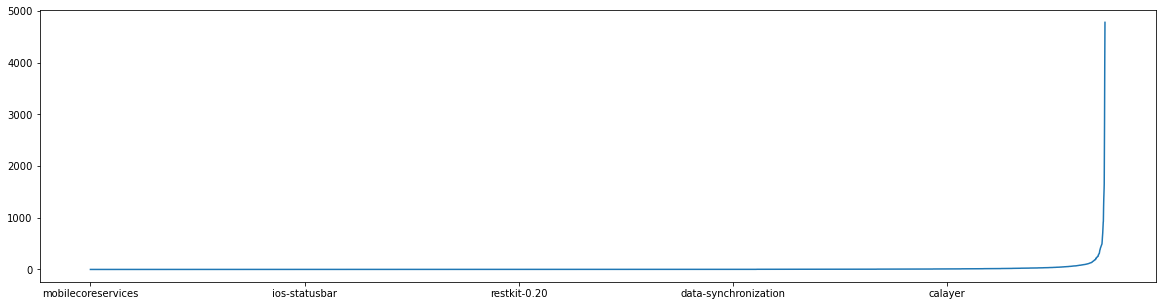

In [29]:
plt.figure(figsize=(20, 5))
sum_column.sort_values().plot()

On ne va garder que les 100 tags les plus utilisés

Text(0.5, 1.0, "Nombre d'occurence du tag")

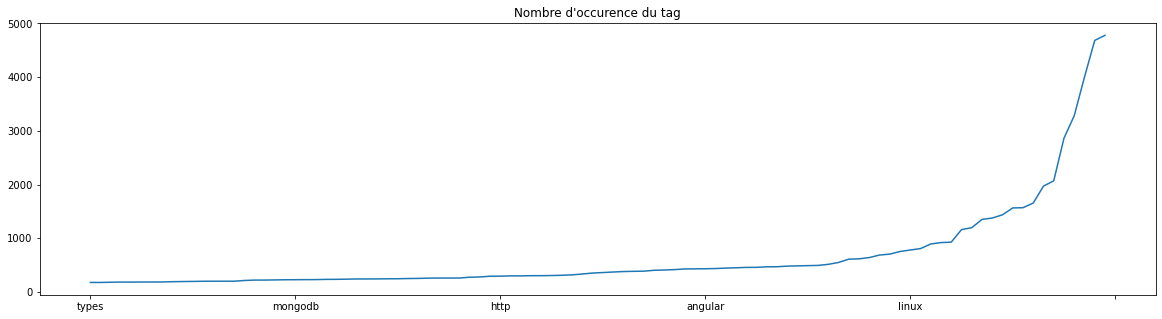

In [30]:
plt.figure(figsize=(20, 5))
sum_column.sort_values()[-100:].plot()
plt.title("Nombre d'occurence du tag")

In [45]:
df2 = df.drop(columns = sum_column.sort_values()[0:-100].index)

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
df2['nbre_tags'] = df2.iloc[:,2:].sum(axis=1)
df2.sort_values(by='nbre_tags')

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title+Body,Tags,numpy,forms,string,angular,class,angularjs,windows,npm,...,reactjs,node.js,shell,arrays,android,language-agnostic,css,collections,eclipse,nbre_tags
20165,"[have, elenium, test, suite, that, runs, many,...","[selenium, selenium-webdriver, webdriver, sele...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41400,"[here, is, slack, private, channel, with, slac...","[bots, slack]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18515,"[there, shortcut, to, run, all, cells, in, an,...","[keyboard-shortcuts, jupyter-notebook]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7191,"[usually, have, policy, in, my, project, to, n...",[cmake],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36415,"[ow, do, we, achieve, recursive, directory, li...","[dos, directory-listing]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25519,"[would, like, to, execute, single, statement, ...","[php, linux, function, shell, command-line]",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5
40037,"[ajax, url, test, html, error, function, do, s...","[javascript, jquery, html, css, ajax]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
40036,"[he, lt, video, gt, tags, autoplay, autoplay, ...","[jquery, ios, objective-c, html, cocoa-touch]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
17480,"[have, dataframe, in, pandas, and, trying, to,...","[python, pandas, numpy, dataframe, types]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [47]:
# On retire tous les individus qui n'ont pas de tags parmi les 100 premiers 
df2 = df2.loc[df2['nbre_tags']>0]
df2.drop(columns = ['nbre_tags','Tags'], inplace=True)

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Nbre d'occurence des 100 premiers tags
sum_column2 = df2.iloc[:,2:-1].sum(axis=0)
print (sum_column2.sort_values())

types           178
java-8          178
forms           182
collections     185
class           185
               ... 
android        2863
c#             3281
java           4000
python         4683
javascript     4777
Length: 98, dtype: int64


C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Regarde la différence de dataset, la perte des individus
print('df2 dimension:',df2.shape)
print('df dimension:',df.shape)

df2 dimension: (40730, 101)
df dimension: (44995, 9476)


C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df2

C:\Users\EliseAndro\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title+Body,numpy,forms,string,angular,class,angularjs,windows,npm,python,...,r,reactjs,node.js,shell,arrays,android,language-agnostic,css,collections,eclipse
0,"[there, any, way, to, tinker, with, the, hone,...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[have, this, gigantic, ugly, string, ransactio...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[am, orking, with, autolayout, and, constraint...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[learning, objective, and, keep, bumping, into...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[there, simple, way, in, pretty, standard, env...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44990,"[ecently, upgraded, the, version, of, jango, f...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44991,"[ow, can, reject, promise, that, returned, by,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44992,"[have, entities, that, are, related, as, one, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44993,"[roblem, want, to, return, file, in, my, et, e...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalisation et construction du dictionnaire

In [37]:
# Stopwords
stop = stopwords.words('english')
df2['Contenu_sw'] = df2['Title+Body'].apply(lambda x: [item for item in x if item not in stop])

In [38]:
# Lemmatisation
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df2['Contenu_sw_lemmatized'] = df2['Contenu_sw'].apply(lemmatize_text)

In [39]:
df2[['Contenu_sw','Contenu_sw_lemmatized']]

,Contenu_sw,Contenu_sw_lemmatized
0,"[way, tinker, hone, indows, machine, plans, ho...","[way, tinker, hone, indows, machine, plan, hon..."
1,"[gigantic, ugly, string, ransaction, started, ...","[gigantic, ugly, string, ransaction, started, ..."
2,"[orking, autolayout, constraints, found, onstr...","[orking, autolayout, constraint, found, onstra..."
3,"[learning, objective, keep, bumping, symbol, u...","[learning, objective, keep, bumping, symbol, u..."
4,"[simple, way, pretty, standard, environment, b...","[simple, way, pretty, standard, environment, b..."
...,...,...
44990,"[ecently, upgraded, version, jango, framework,...","[ecently, upgraded, version, jango, framework,..."
44991,"[ow, reject, promise, returned, async, await, ...","[ow, reject, promise, returned, async, await, ..."
44992,"[entities, related, one, manypublic, class, es...","[entity, related, one, manypublic, class, esta..."
44993,"[roblem, want, return, file, et, eb, ontroller...","[roblem, want, return, file, et, eb, ontroller..."
